# Objective

Stepstone job offers contain different text areas. One area contains the **job profile (tasks)**, another the **applicant profile**.

![content](pictures/contents.png)

The relevant content of the two **text areas** are extracted in this notebook. This is done with the help of text mining methods.

# Preliminary activities

Before the text process can start, some preliminary work must be done.

First of all some packages need to be loaded. 

The module `textMiningFunctions` is a own module of this project. This module contains special text mining functions, which contain processes, that we need in this notebook for several times. The functions of our own module are based on functions and classes of the common textmining packages `nltk`, `HanTa` and `langdetect`.

In [38]:
import pandas as pd
from pymongo import MongoClient
import unicodedata

# own text mining module
import textMiningFunctions as tm

# common text mining module
import nltk
from HanTa import HanoverTagger as ht
import langdetect

The next step is to change the display option of Panda's Data Frames to fully display the text in a cell.

In [39]:
pd.set_option("display.max_colwidth", None)

Then, a connection to the Mongo DB database `stepstone-data` is established.

In [40]:
# connect to server
client = MongoClient('mongodb://localhost:27017/')

# selection of database
db = client["stepstone-data"]

Now, the data is queried and stored in the Pandas data frame `jobDesc`. The fields `id` (external job id stepstone), `applicantProfile` and `tasks` are queried. The internal Mongo DB id (field `__id`) is omitted.

In [41]:
jobDesc = pd.DataFrame(list(db.pJobs.find({},{"jobId":1, "tasks":1, "applicantProfile":1, "_id":0})))

# display top rows
jobDesc.head(3)

,jobId,tasks,applicantProfile
0,7733373,sie implementieren sas vorhersageanalyse lösungen zusammen mit verschiedenen geschäftsbereichen sie stellen qualitativ hochwertige statistische prognosen zur verfügung und erleichtern damit eine schnellere effiziente kunden absatzplanung sie gewährleisten die genauigkeit und stabilität der prognosen mittels geeigneter statistischer verfahren und software lösungen und sorgen für eine kontinuierliche verbesserung von zuverlässigkeit und qualität der prognosen sie bieten ad hoc unterstützung bei prognose und analysefragestellungen mit dem schwerpunkt auf absatzentwicklung von vermarktungsmechaniken,sie haben ihr studium der mathematik statistik quantitative methoden mit erfolg abgeschlossen sie bringen praktische expertise als data analyst mit erfahrung in statistischen methoden z b predictive analytics time series data mining mit sie sind vertraut mit sql oder sas 4gl programmierung erfahrung mit r und oder phyton sind von vorteil sie verfügen über ausgeprägte analytische fähigkeiten sie sind teamfähig und bringen erste erfahrungen im projektmanagement mit sehr gute mündliche schriftliche kenntnisse in deutsch englisch runden ihr profil ab
1,7930448,analyse reporting in adobe analytics sowie die explorative analyse teils großer und diverser verhaltensdaten gehören zum täglichen werkzeugkasten gleichzeitig zeigt die auseinandersetzung mit herausforderungen in den bereichen data warehousing data science natürlicher sprachverarbeitung und maschinellem lernen die perspektiven für den bereich data science im spiegel auf du arbeitest dabei im interdisziplinären spiegel research team mit expert innen aus datenarchitektur der qualitativen und quantitativen nutzerforschung ab testing sowie ux research immer mit dem ziel verhalten sowie beweggründe und motivation unserer leser innen bestmöglich zu verstehen das subteam data science ist darin ein schlankes team das adobe analytics als seine hauptdatenquelle sieht und sich auf python und spark für data engineering und maschinelles lernen sowie r für die explorative analyse verlässt als cloud dienstleister haben wir microsoft azure im einsatz als infrastruktur zur webanalyse testing nutzen wir die adobe experience cloud unsere datenquellen sind dabei zahlreich und vielseitig und kommen insbesondere aus adobe analytics redaktionellen sowie vertrieblichen systemen an der schnittstelle zwischen research analysen daten technologie generierst du mehrwert für die spiegel gruppe dein schwerpunkt liegt dabei auf der analyse unserer webstatistikdaten und der weiterentwicklung unserer analytischen toolbox auf basis von python oder r damit zahlenkolonnen in anwendbare ergebnisse und spannende geschichten überführt werden können aufgrund deiner erfahrungen führst du analysen selbstständig durch und identifizierst gemeinsam mit anderen research kolleg innen produktmanager innen und leitenden redakteur innen potentielle testing produktentwicklungs oder data science anwendungsfälle du setzt analysen reportings im interface von adobe analytics auf und entwickelst eine skalierbare und stringente reportingstruktur mit dem data team du verwandelst verhaltens kunden sowie redaktionsdaten in aussagekräftige und anwendungsbezogene erkenntnisse und trägst auch zur konzeption und auswertung von komplexen a b tests daraus bei die aggregation von verschiedenen datenquellen um erstklassige datensätze bereitzustellen gehört zu deinem standardrepertoire du gestaltest das designs und den aufbau einer modernen analyse und datenarchitektur mit die den anforderungen eines datengetriebenes medienunternehmen entspricht und hilft den spiegel dateninformiert erfolgreich zu halten perspektivisch hast du lust dich gemeinsam mit uns in folgenden bereichen zu entwickeln anwendungen für maschinelles lernen über ihren gesamten lebenszyklus gestalten von der ideenfindung bis zum architekturdesign prototyping und integration in produktivsysteme du entwickelst und skalierst dabei empfehlung und äh

The data frame contains applicant profiles in different languages. The text mining process is language dependent. Therefore, the language of all columns is detected by using the function `detectLanguage()` of the custom module `textMiningFunctions`. The language is stored in the new column `language`.

In [42]:
jobDesc["language"] = (jobDesc["applicantProfile"] + " " + jobDesc["tasks"]).apply(tm.detectLanguage)

Next, all rows that are not in German or English are deleted.

In [43]:
jobDesc = jobDesc[jobDesc["language"].isin(["de","en"])].copy()

In [44]:
jobDesc.head(3)

,jobId,tasks,applicantProfile,language
0,7733373,sie implementieren sas vorhersageanalyse lösungen zusammen mit verschiedenen geschäftsbereichen sie stellen qualitativ hochwertige statistische prognosen zur verfügung und erleichtern damit eine schnellere effiziente kunden absatzplanung sie gewährleisten die genauigkeit und stabilität der prognosen mittels geeigneter statistischer verfahren und software lösungen und sorgen für eine kontinuierliche verbesserung von zuverlässigkeit und qualität der prognosen sie bieten ad hoc unterstützung bei prognose und analysefragestellungen mit dem schwerpunkt auf absatzentwicklung von vermarktungsmechaniken,sie haben ihr studium der mathematik statistik quantitative methoden mit erfolg abgeschlossen sie bringen praktische expertise als data analyst mit erfahrung in statistischen methoden z b predictive analytics time series data mining mit sie sind vertraut mit sql oder sas 4gl programmierung erfahrung mit r und oder phyton sind von vorteil sie verfügen über ausgeprägte analytische fähigkeiten sie sind teamfähig und bringen erste erfahrungen im projektmanagement mit sehr gute mündliche schriftliche kenntnisse in deutsch englisch runden ihr profil ab,de
1,7930448,analyse reporting in adobe analytics sowie die explorative analyse teils großer und diverser verhaltensdaten gehören zum täglichen werkzeugkasten gleichzeitig zeigt die auseinandersetzung mit herausforderungen in den bereichen data warehousing data science natürlicher sprachverarbeitung und maschinellem lernen die perspektiven für den bereich data science im spiegel auf du arbeitest dabei im interdisziplinären spiegel research team mit expert innen aus datenarchitektur der qualitativen und quantitativen nutzerforschung ab testing sowie ux research immer mit dem ziel verhalten sowie beweggründe und motivation unserer leser innen bestmöglich zu verstehen das subteam data science ist darin ein schlankes team das adobe analytics als seine hauptdatenquelle sieht und sich auf python und spark für data engineering und maschinelles lernen sowie r für die explorative analyse verlässt als cloud dienstleister haben wir microsoft azure im einsatz als infrastruktur zur webanalyse testing nutzen wir die adobe experience cloud unsere datenquellen sind dabei zahlreich und vielseitig und kommen insbesondere aus adobe analytics redaktionellen sowie vertrieblichen systemen an der schnittstelle zwischen research analysen daten technologie generierst du mehrwert für die spiegel gruppe dein schwerpunkt liegt dabei auf der analyse unserer webstatistikdaten und der weiterentwicklung unserer analytischen toolbox auf basis von python oder r damit zahlenkolonnen in anwendbare ergebnisse und spannende geschichten überführt werden können aufgrund deiner erfahrungen führst du analysen selbstständig durch und identifizierst gemeinsam mit anderen research kolleg innen produktmanager innen und leitenden redakteur innen potentielle testing produktentwicklungs oder data science anwendungsfälle du setzt analysen reportings im interface von adobe analytics auf und entwickelst eine skalierbare und stringente reportingstruktur mit dem data team du verwandelst verhaltens kunden sowie redaktionsdaten in aussagekräftige und anwendungsbezogene erkenntnisse und trägst auch zur konzeption und auswertung von komplexen a b tests daraus bei die aggregation von verschiedenen datenquellen um erstklassige datensätze bereitzustellen gehört zu deinem standardrepertoire du gestaltest das designs und den aufbau einer modernen analyse und datenarchitektur mit die den anforderungen eines datengetriebenes medienunternehmen entspricht und hilft den spiegel dateninformiert erfolgreich zu halten perspektivisch hast du lust dich gemeinsam mit uns in folgenden bereichen zu entwickeln anwendungen für maschinelles lernen über ihren gesamten lebenszyklus gestalten von der ideenfindung bis zum architekturdesign prototyping und integration in produktivsysteme du entwickelst und skalierst dabei empfe

# Normalization

The first step of the text mining process is called **normalization**. In this step all letters are converted into lowercase letters. This step is performed with the function `normalizeText()` of the module `textMiningFunctions`. This function has two arguments. The first represents the data frame, the second represents the column which the text is normalized in.

> **Note:** The text has already been normalized in the step data preprocessing. For the sake of completeness, this step is also performed in the text mining notebook.

In [45]:
# normalize job tasks
tm.normalizeText(jobDesc, "tasks")

# normalize applicant profile
tm.normalizeText(jobDesc, "applicantProfile")

In [46]:
jobDesc.head(2)

,jobId,tasks,applicantProfile,language
0,7733373,sie implementieren sas vorhersageanalyse lösungen zusammen mit verschiedenen geschäftsbereichen sie stellen qualitativ hochwertige statistische prognosen zur verfügung und erleichtern damit eine schnellere effiziente kunden absatzplanung sie gewährleisten die genauigkeit und stabilität der prognosen mittels geeigneter statistischer verfahren und software lösungen und sorgen für eine kontinuierliche verbesserung von zuverlässigkeit und qualität der prognosen sie bieten ad hoc unterstützung bei prognose und analysefragestellungen mit dem schwerpunkt auf absatzentwicklung von vermarktungsmechaniken,sie haben ihr studium der mathematik statistik quantitative methoden mit erfolg abgeschlossen sie bringen praktische expertise als data analyst mit erfahrung in statistischen methoden z b predictive analytics time series data mining mit sie sind vertraut mit sql oder sas 4gl programmierung erfahrung mit r und oder phyton sind von vorteil sie verfügen über ausgeprägte analytische fähigkeiten sie sind teamfähig und bringen erste erfahrungen im projektmanagement mit sehr gute mündliche schriftliche kenntnisse in deutsch englisch runden ihr profil ab,de
1,7930448,analyse reporting in adobe analytics sowie die explorative analyse teils großer und diverser verhaltensdaten gehören zum täglichen werkzeugkasten gleichzeitig zeigt die auseinandersetzung mit herausforderungen in den bereichen data warehousing data science natürlicher sprachverarbeitung und maschinellem lernen die perspektiven für den bereich data science im spiegel auf du arbeitest dabei im interdisziplinären spiegel research team mit expert innen aus datenarchitektur der qualitativen und quantitativen nutzerforschung ab testing sowie ux research immer mit dem ziel verhalten sowie beweggründe und motivation unserer leser innen bestmöglich zu verstehen das subteam data science ist darin ein schlankes team das adobe analytics als seine hauptdatenquelle sieht und sich auf python und spark für data engineering und maschinelles lernen sowie r für die explorative analyse verlässt als cloud dienstleister haben wir microsoft azure im einsatz als infrastruktur zur webanalyse testing nutzen wir die adobe experience cloud unsere datenquellen sind dabei zahlreich und vielseitig und kommen insbesondere aus adobe analytics redaktionellen sowie vertrieblichen systemen an der schnittstelle zwischen research analysen daten technologie generierst du mehrwert für die spiegel gruppe dein schwerpunkt liegt dabei auf der analyse unserer webstatistikdaten und der weiterentwicklung unserer analytischen toolbox auf basis von python oder r damit zahlenkolonnen in anwendbare ergebnisse und spannende geschichten überführt werden können aufgrund deiner erfahrungen führst du analysen selbstständig durch und identifizierst gemeinsam mit anderen research kolleg innen produktmanager innen und leitenden redakteur innen potentielle testing produktentwicklungs oder data science anwendungsfälle du setzt analysen reportings im interface von adobe analytics auf und entwickelst eine skalierbare und stringente reportingstruktur mit dem data team du verwandelst verhaltens kunden sowie redaktionsdaten in aussagekräftige und anwendungsbezogene erkenntnisse und trägst auch zur konzeption und auswertung von komplexen a b tests daraus bei die aggregation von verschiedenen datenquellen um erstklassige datensätze bereitzustellen gehört zu deinem standardrepertoire du gestaltest das designs und den aufbau einer modernen analyse und datenarchitektur mit die den anforderungen eines datengetriebenes medienunternehmen entspricht und hilft den spiegel dateninformiert erfolgreich zu halten perspektivisch hast du lust dich gemeinsam mit uns in folgenden bereichen zu entwickeln anwendungen für maschinelles lernen über ihren gesamten lebenszyklus gestalten von der ideenfindung bis zum architekturdesign prototyping und integration in produktivsysteme du entwickelst und skalierst dabei empfe

# Tokenization

The next step is called **Tokenization**. In this step, the text is broken down into individual words, so-called **tokens**. 

This step is performed by using the `tokenizeText()` function of the `textMiningFunctions` module.  The first argument represents the data frame, the second represents the column which the text is tokenized in. The function `tokenizeText()` uses the `RegexpTokenizer` class of the Python package `nltk`.

In [47]:
# tokenize job tasks
tm.tokenizeText(jobDesc, "tasks")

# tokenize applicant profile
tm.tokenizeText(jobDesc, "applicantProfile")

In [48]:
jobDesc.head(2)

,jobId,tasks,applicantProfile,language
0,7733373,"[sie, implementieren, sas, vorhersageanalyse, lösungen, zusammen, mit, verschiedenen, geschäftsbereichen, sie, stellen, qualitativ, hochwertige, statistische, prognosen, zur, verfügung, und, erleichtern, damit, eine, schnellere, effiziente, kunden, absatzplanung, sie, gewährleisten, die, genauigkeit, und, stabilität, der, prognosen, mittels, geeigneter, statistischer, verfahren, und, software, lösungen, und, sorgen, für, eine, kontinuierliche, verbesserung, von, zuverlässigkeit, und, qualität, der, prognosen, sie, bieten, ad, hoc, unterstützung, bei, prognose, und, analysefragestellungen, mit, dem, schwerpunkt, auf, absatzentwicklung, von, vermarktungsmechaniken]","[sie, haben, ihr, studium, der, mathematik, statistik, quantitative, methoden, mit, erfolg, abgeschlossen, sie, bringen, praktische, expertise, als, data, analyst, mit, erfahrung, in, statistischen, methoden, z, b, predictive, analytics, time, series, data, mining, mit, sie, sind, vertraut, mit, sql, oder, sas, 4gl, programmierung, erfahrung, mit, r, und, oder, phyton, sind, von, vorteil, sie, verfügen, über, ausgeprägte, analytische, fähigkeiten, sie, sind, teamfähig, und, bringen, erste, erfahrungen, im, projektmanagement, mit, sehr, gute, mündliche, schriftliche, kenntnisse, in, deutsch, englisch, runden, ihr, profil, ab]",de
1,7930448,"[analyse, reporting, in, adobe, analytics, sowie, die, explorative, analyse, teils, großer, und, diverser, verhaltensdaten, gehören, zum, täglichen, werkzeugkasten, gleichzeitig, zeigt, die, auseinandersetzung, mit, herausforderungen, in, den, bereichen, data, warehousing, data, science, natürlicher, sprachverarbeitung, und, maschinellem, lernen, die, perspektiven, für, den, bereich, data, science, im, spiegel, auf, du, arbeitest, dabei, im, interdisziplinären, spiegel, research, team, mit, expert, innen, aus, datenarchitektur, der, qualitativen, und, quantitativen, nutzerforschung, ab, testing, sowie, ux, research, immer, mit, dem, ziel, verhalten, sowie, beweggründe, und, motivation, unserer, leser, innen, bestmöglich, zu, verstehen, das, subteam, data, science, ist, darin, ein, schlankes, team, das, adobe, analytics, als, seine, hauptdatenquelle, sieht, ...]","[du, hast, mindestens, 2, jahre, relevante, erfahrung, in, der, analyse, von, großen, datenmengen, sammeln, können, du, kennst, dich, gut, mit, gängigen, webanalysetools, bevorzugt, adobe, analytics, sowie, mit, datenvisualisierung, datenzugriff, automation, und, datenspeicherung, aus, du, hast, sehr, gute, kenntnisse, in, python, oder, r, und, hast, auch, schon, im, umfeld, von, microsoft, azure, gearbeitet, du, verfügst, über, fundierte, methodenkenntnisse, und, praktische, erfahrung, statistik, du, hast, die, fähigkeit, dir, end, to, end, datenlösungen, vorzustellen, und, die, richtigen, prioritäten, zu, setzen, offenheit, dein, wissen, mit, kolleg, innen, zu, teilen, und, von, anderen, zu, lernen, bevorzugt, aber, nicht, erforderlich, praktische, erfahrung, mit, überwachten, und, unüberwachten, ...]",de


# Stopword removal

The generated token lists in the last step contain stopwords (e.g. "will", "or", "and"). These words  do not contain valuable information, so the stopwords are deleted. This is done in this step.

The stopword removal is performed by using the function `removeStopwords` of the package `textMiningFunctions`. This function, unlike the functions in the previous two steps, has the additional argument language, because the stopwords are language dependent. The function uses the language dependent stopword lists of the `nltk` package.

In [49]:
tm.removeStopwords(jobDesc, "tasks", "language")
tm.removeStopwords(jobDesc, "applicantProfile", "language")

In [50]:
jobDesc.head(2)

,jobId,tasks,applicantProfile,language
0,7733373,"[implementieren, sas, vorhersageanalyse, lösungen, zusammen, verschiedenen, geschäftsbereichen, stellen, qualitativ, hochwertige, statistische, prognosen, verfügung, erleichtern, schnellere, effiziente, kunden, absatzplanung, gewährleisten, genauigkeit, stabilität, prognosen, mittels, geeigneter, statistischer, verfahren, software, lösungen, sorgen, kontinuierliche, verbesserung, zuverlässigkeit, qualität, prognosen, bieten, ad, hoc, unterstützung, prognose, analysefragestellungen, schwerpunkt, absatzentwicklung, vermarktungsmechaniken]","[studium, mathematik, statistik, quantitative, methoden, erfolg, abgeschlossen, bringen, praktische, expertise, data, analyst, erfahrung, statistischen, methoden, z, b, predictive, analytics, time, series, data, mining, vertraut, sql, sas, 4gl, programmierung, erfahrung, r, phyton, vorteil, verfügen, ausgeprägte, analytische, fähigkeiten, teamfähig, bringen, erste, erfahrungen, projektmanagement, gute, mündliche, schriftliche, kenntnisse, deutsch, englisch, runden, profil, ab]",de
1,7930448,"[analyse, reporting, adobe, analytics, sowie, explorative, analyse, teils, großer, diverser, verhaltensdaten, gehören, täglichen, werkzeugkasten, gleichzeitig, zeigt, auseinandersetzung, herausforderungen, bereichen, data, warehousing, data, science, natürlicher, sprachverarbeitung, maschinellem, lernen, perspektiven, bereich, data, science, spiegel, arbeitest, dabei, interdisziplinären, spiegel, research, team, expert, innen, datenarchitektur, qualitativen, quantitativen, nutzerforschung, ab, testing, sowie, ux, research, immer, ziel, verhalten, sowie, beweggründe, motivation, unserer, leser, innen, bestmöglich, verstehen, subteam, data, science, darin, schlankes, team, adobe, analytics, hauptdatenquelle, sieht, python, spark, data, engineering, maschinelles, lernen, sowie, r, explorative, analyse, verlässt, cloud, dienstleister, microsoft, azure, einsatz, infrastruktur, webanalyse, testing, nutzen, adobe, experience, cloud, datenquellen, dabei, zahlreich, vielseitig, kommen, insbesondere, adobe, ...]","[hast, mindestens, 2, jahre, relevante, erfahrung, analyse, großen, datenmengen, sammeln, kennst, gut, gängigen, webanalysetools, bevorzugt, adobe, analytics, sowie, datenvisualisierung, datenzugriff, automation, datenspeicherung, hast, gute, kenntnisse, python, r, hast, schon, umfeld, microsoft, azure, gearbeitet, verfügst, fundierte, methodenkenntnisse, praktische, erfahrung, statistik, hast, fähigkeit, end, to, end, datenlösungen, vorzustellen, richtigen, prioritäten, setzen, offenheit, wissen, kolleg, innen, teilen, lernen, bevorzugt, erforderlich, praktische, erfahrung, überwachten, unüberwachten, maschinellen, lerntechniken, kenntnisse, machine, learning, frameworks, cloudbasierten, datenanalysetools, kenntnisse, softwareentwicklung, erfahrungen, big, data, anwendungen, z, b, spark, cloud, plattformen, aws, azure, google, cloud, containerisierung, docker, kubernetes]",de


# Pos Tagging and Lemmatization

In this section the **Pos tagging** and the **Lemmatization** are performed. In the pos tagging, the word class (e.g. noun, verb, adjective) of each word is determined. In the lemmatization, the token is replaced by its lemma, eg. canonical form (e.g. went is replaced by go). These two steps are processed in the same section because some functions perform both steps together and  lemmatization performs better if the pos tag is known.

The most relevant information is contained in nouns (e.g. Python, SQL). Therefore, tokens with another wordclass are removed from the data frame in this step.

This step is performed with the function `TagLem()` of the module `textMiningFunctions`. This function has the same arguments like the function `removeStopwords` (step stopword removal) and uses objects of different packages:
* German tokens are tagged and lemmatized with the package `HaNa`. This package contains the class `HanoverTagger`. An instance of this class contains the method `tag_sent()` which returns the pos tag and the lemma of the token in once. 
* English tokens are tagged and lemmatized with the package `nltk`. The `pos_tag()` function of this package is used for pos tagging and the `WordNetLemmatizer` class is used for lemmatizing.

In [54]:
tm.TagLem(jobDesc, "tasks", "language")
tm.TagLem(jobDesc, "applicantProfile", "language")

In [55]:
jobDesc.head(2)

,jobId,tasks,applicantProfile,language
0,7733373,"[sas, lösung, geschäftsbereich, prognose, verfügung, kunde, absatzplanung, genauigkeit, stabilität, prognose, verfahren, software, lösung, verbesserung, zuverlässigkeit, qualität, prognose, ad, hoc, unterstützung, prognose, schwerpunkt, absatzentwicklung]","[studium, mathematik, statistik, methode, erfolg, expertise, data, analyst, erfahrung, methode, z, predictive, analytics, time, series, data, mining, sql, sas, 4gl, programmierung, erfahrung, r, phyton, vorteil, fähigkeit, erfahrung, kenntnis, profil]",de
1,7930448,"[analyse, reporting, adobe, analytics, analyse, verhaltensdatum, auseinandersetzung, herausforderung, bereich, data, warehousing, data, science, sprachverarbeitung, perspektive, bereich, data, science, spiegel, spiegel, research, team, nutzerforschung, testing, ux, research, ziel, beweggrund, motivation, leser, subteam, data, science, team, adobe, analytics, hauptdatenquelle, python, spark, data, engineering, r, analyse, cloud, dienstleister, microsoft, azure, einsatz, infrastruktur, webanalyse, testing, adobe, experience, cloud, adobe, analytics, system, schnittstelle, research, analyse, datum, technologie, mehrwert, spiegel, gruppe, schwerpunkt, analyse, weiterentwicklung, toolbox, basis, python, r, ergebnis, geschichte, erfahrung, analyse, research, kolleg, redakteur, testing, produktentwicklungs, data, science, anwendungsfälle, analyse, reportings, interface, adobe, analytics, reportingstruktur, data, team, verhalten, kunde, erkenntnis, konzeption, auswertung, test, aggregation, datumensatz, ...]","[jahr, erfahrung, analyse, webanalysetools, adobe, analytics, datenvisualisierung, datenzugriff, automation, datenspeicherung, kenntnis, python, r, umfeld, microsoft, azure, methodenkenntnisse, erfahrung, statistik, fähigkeit, to, priorität, offenheit, kolleg, erfahrung, lerntechniken, kenntnis, machine, learning, frameworks, cloudbasierten, datenanalysetools, kenntnis, softwareentwicklung, erfahrung, big, data, anwendung, z, spark, cloud, plattform, aws, azure, cloud, containerisierung, docker, kubernetes]",de


# Token combinations

Some aspects (e.g. tasks  or competencies) consist of two or more tokens so-called **n-grams** or **token combinations** (e.g. machine learning or business intelligence). Token combinations of two (2-grams) are created in this section.

These two grams can be created with the function `bigrams()` of the package `nltk`. The input of this function is a list of tokens. The function returns all possible two grams.

In [56]:
tokens = ["Das", "Business", "Intelligence", "Tool", "kann", "Daten", "gut", "darstellen"]

list(nltk.bigrams(tokens))

[('Das', 'Business'),
 ('Business', 'Intelligence'),
 ('Intelligence', 'Tool'),
 ('Tool', 'kann'),
 ('kann', 'Daten'),
 ('Daten', 'gut'),
 ('gut', 'darstellen')]

Our module `textMiningFunctions` contains the function `createTokenCombinations()`. This function creates token combinations of two and uses the function `Bigrams()`. This function has two arguments. The first represents the data frame, the second represents the column for which token combinations must be created. The function adds a new column to the data frame which contains the token combinations. This column has the suffix **Comb**.


> **Note:** In this section all possible token combinations are determined. Infrequent token combinations are removed in the next section.

In [57]:
tm.createTokenCombinations(jobDesc,"tasks")
tm.createTokenCombinations(jobDesc,"applicantProfile")

In [58]:
jobDesc.head(3)

,jobId,tasks,applicantProfile,language,tasksComb,applicantProfileComb
0,7733373,"[sas, lösung, geschäftsbereich, prognose, verfügung, kunde, absatzplanung, genauigkeit, stabilität, prognose, verfahren, software, lösung, verbesserung, zuverlässigkeit, qualität, prognose, ad, hoc, unterstützung, prognose, schwerpunkt, absatzentwicklung]","[studium, mathematik, statistik, methode, erfolg, expertise, data, analyst, erfahrung, methode, z, predictive, analytics, time, series, data, mining, sql, sas, 4gl, programmierung, erfahrung, r, phyton, vorteil, fähigkeit, erfahrung, kenntnis, profil]",de,"[sas lösung, lösung geschäftsbereich, geschäftsbereich prognose, prognose verfügung, verfügung kunde, kunde absatzplanung, absatzplanung genauigkeit, genauigkeit stabilität, stabilität prognose, prognose verfahren, verfahren software, software lösung, lösung verbesserung, verbesserung zuverlässigkeit, zuverlässigkeit qualität, qualität prognose, prognose ad, ad hoc, hoc unterstützung, unterstützung prognose, prognose schwerpunkt, schwerpunkt absatzentwicklung]","[studium mathematik, mathematik statistik, statistik methode, methode erfolg, erfolg expertise, expertise data, data analyst, analyst erfahrung, erfahrung methode, methode z, z predictive, predictive analytics, analytics time, time series, series data, data mining, mining sql, sql sas, sas 4gl, 4gl programmierung, programmierung erfahrung, erfahrung r, r phyton, phyton vorteil, vorteil fähigkeit, fähigkeit erfahrung, erfahrung kenntnis, kenntnis profil]"
1,7930448,"[analyse, reporting, adobe, analytics, analyse, verhaltensdatum, auseinandersetzung, herausforderung, bereich, data, warehousing, data, science, sprachverarbeitung, perspektive, bereich, data, science, spiegel, spiegel, research, team, nutzerforschung, testing, ux, research, ziel, beweggrund, motivation, leser, subteam, data, science, team, adobe, analytics, hauptdatenquelle, python, spark, data, engineering, r, analyse, cloud, dienstleister, microsoft, azure, einsatz, infrastruktur, webanalyse, testing, adobe, experience, cloud, adobe, analytics, system, schnittstelle, research, analyse, datum, technologie, mehrwert, spiegel, gruppe, schwerpunkt, analyse, weiterentwicklung, toolbox, basis, python, r, ergebnis, geschichte, erfahrung, analyse, research, kolleg, redakteur, testing, produktentwicklungs, data, science, anwendungsfälle, analyse, reportings, interface, adobe, analytics, reportingstruktur, data, team, verhalten, kunde, erkenntnis, konzeption, auswertung, test, aggregation, datumensatz, ...]","[jahr, erfahrung, analyse, webanalysetools, adobe, analytics, datenvisualisierung, datenzugriff, automation, datenspeicherung, kenntnis, python, r, umfeld, microsoft, azure, methodenkenntnisse, erfahrung, statistik, fähigkeit, to, priorität, offenheit, kolleg, erfahrung, lerntechniken, kenntnis, machine, learning, frameworks, cloudbasierten, datenanalysetools, kenntnis, softwareentwicklung, erfahrung, big, data, anwendung, z, spark, cloud, plattform, aws, azure, cloud, containerisierung, docker, kubernetes]",de,"[analyse reporting, reporting adobe, adobe analytics, analytics analyse, analyse verhaltensdatum, verhaltensdatum auseinandersetzung, auseinandersetzung herausforderung, herausforderung bereich, bereich data, data warehousing, warehousing data, data science, science sprachverarbeitung, sprachverarbeitung perspektive, perspektive bereich, bereich data, data science, science spiegel, spiegel spiegel, spiegel research, research team, team nutzerforschung, nutzerforschung testing, testing ux, ux research, research ziel, ziel beweggrund, beweggrund motivation, motivation leser, leser subteam, subteam data, data science, science team, team adobe, adobe analytics, analytics hauptdatenquelle, hauptdatenquelle python, python spark, spark data, data engineering, engineering r, r analyse, analyse cloud, cloud dienstleister, dienstleister microsoft, microsoft azure, azure einsatz, einsatz infrastruktur, infrastruktur webanalyse, 

# Removing Duplicates

In our analysis, it is only relevant if a token occurs in a job offer or not. It is not relevant how often a token occurs. Therefore, duplicates are removed in the next step with the function `removeDuplicates()`.

In [59]:
# tokens
tm.removeDuplicates(jobDesc, "tasks")
tm.removeDuplicates(jobDesc, "applicantProfile")

# token combinations
tm.removeDuplicates(jobDesc, "tasksComb")
tm.removeDuplicates(jobDesc, "applicantProfileComb")

# Selection of relevant objects

In this section, the relevant tokens and token combinations are filtered. 

This section contains three parts. The first part gives an overview of the number and distribution of tokens and token combinations. Based on this information, deletion boundaries are defined. In the second part, infrequent tokens and token combinations are removed according to these deletion boundaries.

In a third part, the remaining general tokens and token combinations without added value are removed.

## Overview of the object number and distribution

The module `textMiningFunctions` contains the function `countDistinctObjects()`. This function returns the number of distinct tokens or token combinations in a column.

First, the function is applied on the columns with the tokens.

In [60]:
print("Tasks: ",tm.countDistinctObjects(jobDesc,"tasks"))
print("Applicant Profile: ",tm.countDistinctObjects(jobDesc,"applicantProfile"))

Tasks:  5927
Applicant Profile:  4403


It is obvious, that the descriptions of the job tasks have the most distinct tokens.

Next, the function is applied on the columns with the token combinations.

In [61]:
print("Tasks: ",tm.countDistinctObjects(jobDesc,"tasksComb"))
print("Applicant Profile: ",tm.countDistinctObjects(jobDesc,"applicantProfileComb"))

Tasks:  31320
Applicant Profile:  22771


You can see that the task descriptions also contain the most distinct token combinations. Furthermore, there are generally  more distinct token combinations than tokens.

The next step is to determine the object distribution. This can be achieved with the function `getFrequencyDistributionPlots()` of the module `textMiningFunctions`. This function plots the cumulative token (combination) distribution. The first argument of this function is the data frame. The second argument is a list of columns for which the distribution is plotted. The third argument determines the length of the x axis. The function returns the cumulative token (combination) distribution for the respective columns and is first applied to the columns with the tokens. 

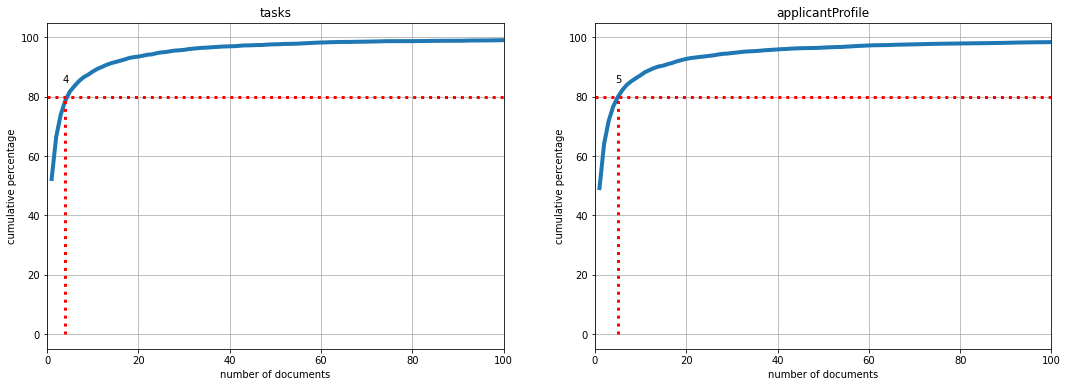

In [62]:
tm.getFrequencyDistributionPlots(jobDesc,["tasks","applicantProfile"],100)

It is obvious that the most tokens exist on only a few job offers. Nearly 80 percent of tokens are found on around 4 or 5 job listings or less (red dotted lines and number). For comparison, the data frame contains more than 1100 job offers. 

Next, the cumulative token distribution is plotted for the token combinations.

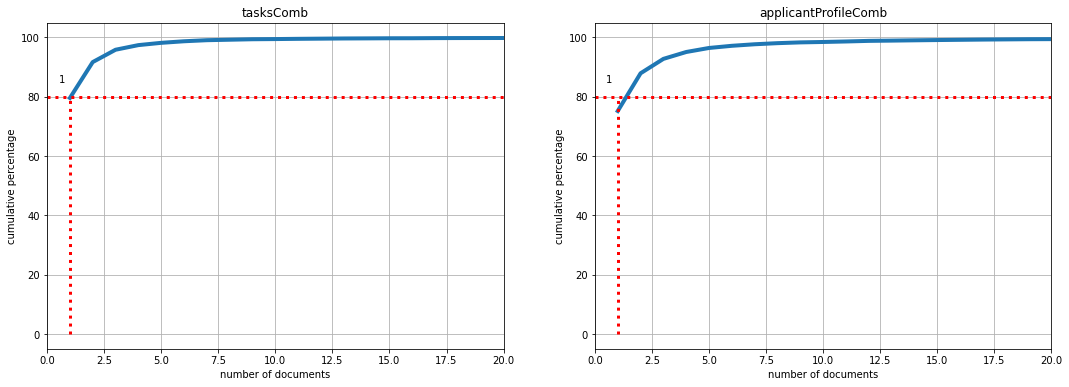

In [63]:
tm.getFrequencyDistributionPlots(jobDesc,["tasksComb","applicantProfileComb"],20)

You can see, that almost 80 percent of the token combinations are only on one job offer. 

In this project, we focus on the most relevant tokens and token combinations. These are tokens which appear in **at least 50** job offers and token combinations which appear in **at least 30** job offers. The previous plots show that token combinations tend to be present on fewer job offers than tokens. Therefore, the definition of relevant token combinations is different from the definition of relevant tokens.

> **Note:** The boundaries were chosen in an iterative process so that enough tokens and token combinations remain in the data frame.

## Deletion of infrequent objects

Now, infrequent tokens and token combinations are deleted according to the rules defined in the previous part. This is achieved with the function `removeInfrequentObjects`. The first argument of this function is the data frame. The second argument is the column in which infrequent tokens must be deleted. The last argument is the minimum number of job offers on which the tokens or token combinations must be present in order to remain in the data set.

In [64]:
# delete infrequent tokens
tm.removeInfrequentObjects(jobDesc,"tasks",50)
tm.removeInfrequentObjects(jobDesc,"applicantProfile",50)

# delete infrequent token combinations
tm.removeInfrequentObjects(jobDesc,"tasksComb",30)
tm.removeInfrequentObjects(jobDesc,"applicantProfileComb",30)

The remaining number of distinct tokens:

In [65]:
print("Tasks: ",tm.countDistinctObjects(jobDesc,"tasks"))
print("Applicant Profile: ",tm.countDistinctObjects(jobDesc,"applicantProfile"))

Tasks:  139
Applicant Profile:  154


The remaining number of distinct token combinations:

In [66]:
print("Tasks: ",tm.countDistinctObjects(jobDesc,"tasksComb"))
print("Applicant Profile: ",tm.countDistinctObjects(jobDesc,"applicantProfileComb"))

Tasks:  26
Applicant Profile:  66


## Deletion of general objects

In this step tokens and token combinations which are not specific to data science jobs are removed (**custom stopwords**).

First, lists with tokens and token combinations which must be removed, are defined. These tokens and token combinations are determined in an iterative process.

In [67]:
# tokens
delToken = ['erfahrung','kenntnis','experience','z','umgang','fähigkeit','wort','schrift','year','arbeitsweise','knowledge','umfeld'
,'anforderung','unterstützung','customer','work','aufgabe','durchführung']

# token combinations
delTokenComb = ['erfahrung bereich','bereich data','berufserfahrung bereich','year experience','erfahrung umgang','know how','kenntnis bereich'
,'e g','kenntnis umgang','kenntnis erfahrung','vorteil erfahrung','umgang m','scientist data','state art','learning modell']

Then, the tokens and token combinations are removed with the function `removeCustomStopwords()` of the package `textMiningFunctions`. The function has three arguments. The first one is the data frame, the second one is the column where the tokens or token combinations must be removed and the third one is the custom stopword list.

In [68]:
# remove custom stopword tokens
tm.removeCustomStopwords(jobDesc,"applicantProfile", delToken)
tm.removeCustomStopwords(jobDesc,"tasks", delToken)

# remove custom stopword token combinations
tm.removeCustomStopwords(jobDesc,"applicantProfileComb", delTokenComb)
tm.removeCustomStopwords(jobDesc,"tasksComb", delTokenComb)

# Upload to Mongo DB

In this last section the tokens and token combinations are uploaded to Mongo DB.

The first step is to extract the data from the pandas data frame to a list which contains different dictionaries.

In [69]:
# save to dictionary
jobList = jobDesc.to_dict("records")

# print one entry
print(jobList[3])

{'jobId': '7928772', 'tasks': ['datum', 'erstellung', 'monitoring', 'analyse', 'methode', 'produkt', 'implementierung', 'prozeß', 'entwicklung'], 'applicantProfile': ['tableau', 'informatik', 'r', 'python', 'business', 'qualifikation', 'mathematik', 'bereich', 'programmierung', 'entwicklung', 'c', 'java', 'interesse', 'intelligence', 'learning', 'wirtschaft', 'machine', 'statistik', 'studium', 'tools'], 'language': 'de', 'tasksComb': [], 'applicantProfileComb': ['business intelligence', 'java script', 'studium bereich', 'python java', 'wirtschaft informatik', 'machine learning', 'wirtschaft mathematik']}


The second step is to insert the data into the `tmJobs` collection. Existing data must be removed beforehand in order to avoid duplicates.

In [70]:
# delete old data
db.tmJobs.delete_many({})

# insert new data
db.tmJobs.insert_many(jobList)